<a href="https://colab.research.google.com/github/DuyMinhDo/PriceChangePrediction/blob/main/FPT_Price_Volatility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('FPT.csv')
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


In [3]:
df.dtypes


,0
Ticker,object
Date/Time,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Open Interest,int64


Convert to Data in H1

In [4]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df.set_index('Date/Time', inplace=True)
daily_data = df.resample('H').agg({
    'Open': 'first',
    'Close': 'last',
    'High': 'max',
    'Low': 'min',
    'Volume': 'sum'
}).reset_index()
daily_data


<ipython-input-4-5cebcb3fbeb6>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_data = df.resample('H').agg({


,Date/Time,Open,Close,High,Low,Volume
0,2018-12-25 09:00:00,30.89,30.66,30.89,30.59,84960
1,2018-12-25 10:00:00,NaN,NaN,NaN,NaN,0
2,2018-12-25 11:00:00,NaN,NaN,NaN,NaN,0
3,2018-12-25 12:00:00,NaN,NaN,NaN,NaN,0
4,2018-12-25 13:00:00,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
17473,2020-12-22 10:00:00,57.50,57.40,57.50,57.30,358010
17474,2020-12-22 11:00:00,57.50,57.40,57.80,57.30,359420
17475,2020-12-22 12:00:00,NaN,NaN,NaN,NaN,0
17476,2020-12-22 13:00:00,57.50,58.00,58.00,57.50,890850


Text(0, 0.5, 'close')

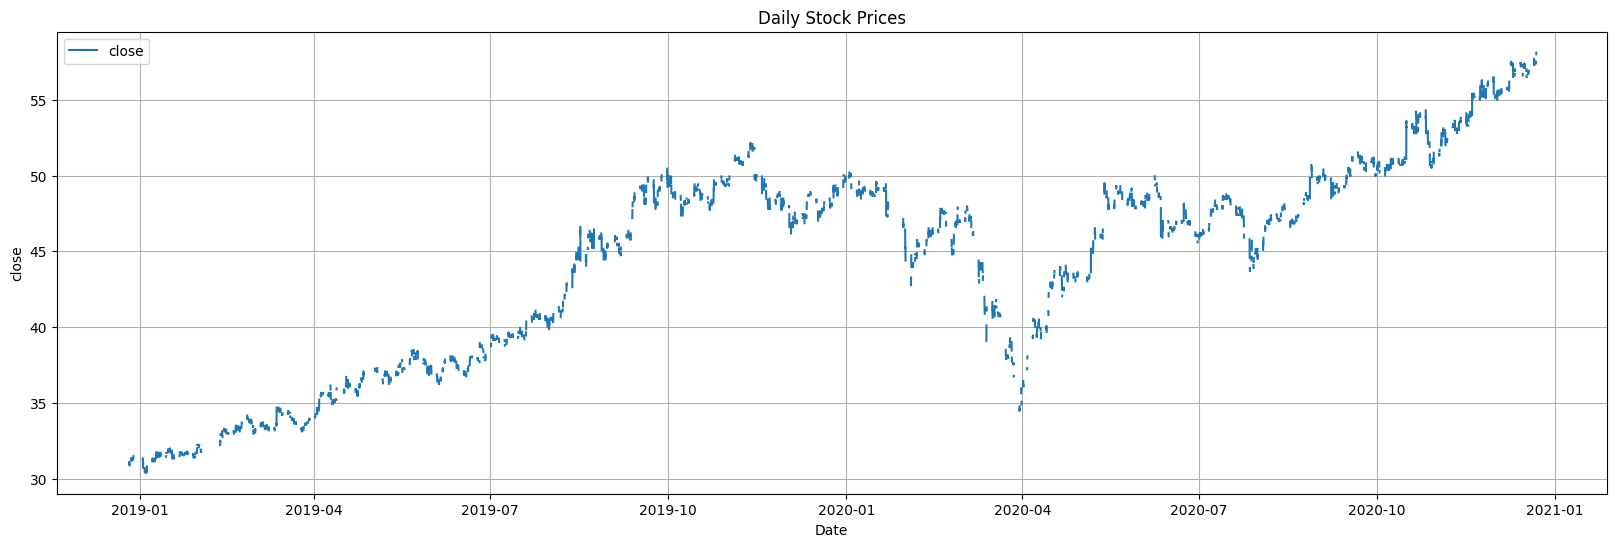

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(daily_data['Date/Time'], daily_data['Close'], label='close')
plt.title('Daily Stock Prices')
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('close')

In [6]:
daily_data['Price Change']= daily_data['Close'] - daily_data['Close'].shift(+1)
daily_data.dropna(inplace=True)  # Drop the last row with NaN values
daily_data[['Date/Time', 'Close', 'Price Change']]



,Date/Time,Close,Price Change
25,2018-12-26 10:00:00,31.07,-0.04
26,2018-12-26 11:00:00,30.96,-0.11
29,2018-12-26 14:00:00,30.89,-0.15
49,2018-12-27 10:00:00,31.34,0.08
50,2018-12-27 11:00:00,31.34,0.00
...,...,...,...
17450,2020-12-21 11:00:00,57.40,-0.30
17453,2020-12-21 14:00:00,57.50,0.20
17473,2020-12-22 10:00:00,57.40,-0.10
17474,2020-12-22 11:00:00,57.40,0.00


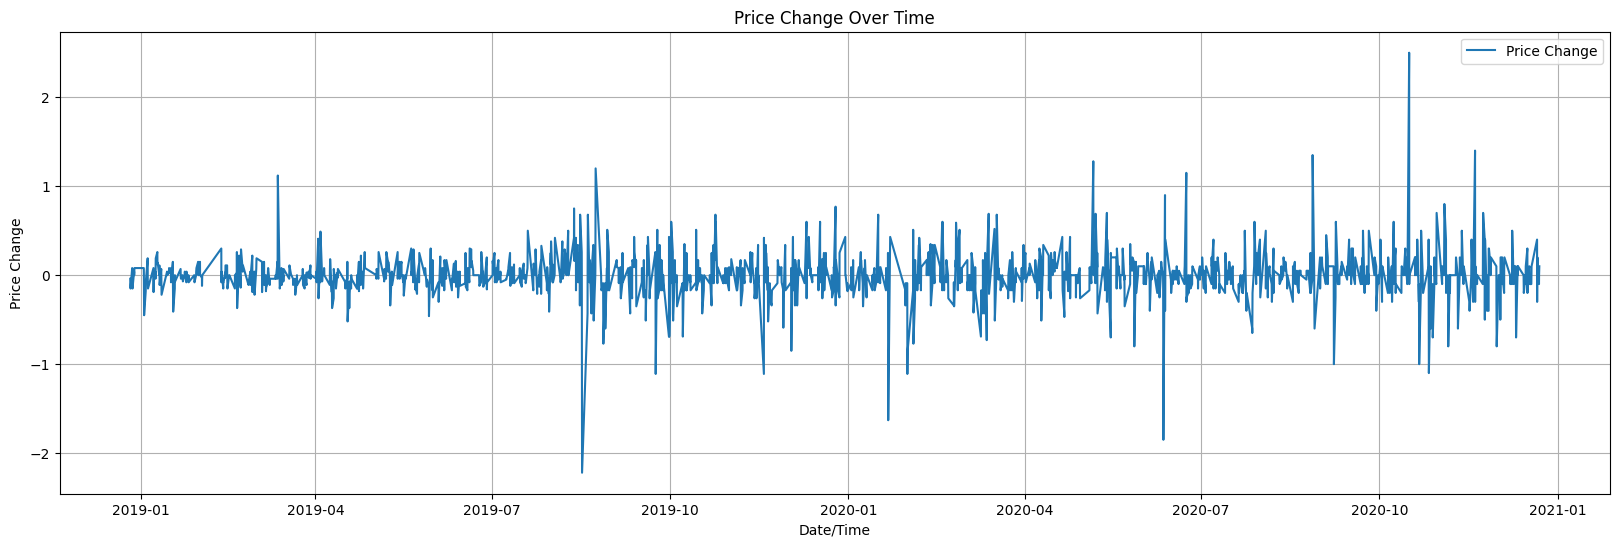

In [7]:
plt.figure(figsize=(20, 6))
plt.plot(daily_data['Date/Time'], daily_data['Price Change'], label='Price Change')
plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Price Change Over Time')
plt.legend()
plt.grid(True)
plt.show()


Linear Regression and Raindom Forest

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [9]:
X = daily_data[['Open', 'High', 'Low', 'Volume', 'Close']]
y = daily_data['Price Change']

Split (80% for train and 20% for test)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Random Forest and hyperparameter


In [13]:
# Create Object for RFR
rf = RandomForestRegressor()

#Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Create a GridSearchCV Object
grid_search = GridSearchCV(rf, param_grid, cv = 10, scoring = 'r2')

#Fit the GridSearchCV object to training Data
grid_search.fit(X_train, y_train)

#Print the best hypeparameters
print(grid_search.best_params_)

best_params = grid_search.best_params_


KeyboardInterrupt: 

Initialize models

In [ ]:
rf = RandomForestRegressor(**best_params)
linear_model = LinearRegression()


Train the models


In [ ]:
linear_model.fit(X_train, y_train)
rf.fit(X_train, y_train)

Predict by RandomForest and Linear Regression

In [ ]:
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)


mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Random Forest): {mse_rf}')

print(f'R-squared (Random Forest): {r2_rf}')
print(f'R-squared (Linear Regression): {r2_linear}')


In [ ]:
plt.figure(figsize=(20, 6))
test_dates = daily_data['Date/Time'][len(daily_data) - len(y_test):]
plt.plot(test_dates, y_test, label='Actual Price Change', color='blue')
plt.plot(test_dates, y_pred_linear, label='Predicted (Linear Regression)', color='green')
plt.plot(test_dates, y_pred_rf, label='Predicted (Random Forest)', color='darksalmon')



plt.title('Actual vs Predicted Price Change')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.show()

LSTM


In [14]:
from sklearn.preprocessing import MinMaxScaler #use for scaling and normalizing data

#Normalize
scaler = MinMaxScaler() #initilaize object
price_change_scaler = MinMaxScaler()

# Select only numeric features for scaling
numeric_features = daily_data.select_dtypes(include=['number']).columns
daily_data_scaled = scaler.fit_transform(daily_data[numeric_features]) #fit the scaler by calculating min and max value, then transform to 0 1

# Fit the price_change_scaler to the 'Price Change' column
price_change_scaler.fit(daily_data[['Price Change']])

#Split the data into training and testing set
train_size = int(len(daily_data_scaled) * 0.8)
train_data, test_data = daily_data_scaled[:train_size], daily_data_scaled[train_size:]

In [15]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range (len(data) - sequence_length ):
        x.append(data[i:(i+ sequence_length), 0]) # Collect sequence of length
        y.append(data[i + sequence_length, 0]) # Collect the next value as the target
    return np.array(x), np.array(y) #Converts the list of input sequences and target value into a NumPy array.

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


# Reshape to (samples, sequence_length, features) for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
!pip install scikeras
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input


def create_model(units=50, dropout_rate=0.2, optimizer='adam'):
    # Define the input shape using Input layer
    inputs = Input(shape=(X_train.shape[1], 1))

    # First LSTM layer (no need to specify input_shape here)
    x = LSTM(units=units, return_sequences=True)(inputs)
    x = Dropout(dropout_rate)(x)

    # Second LSTM layer
    x = LSTM(units=units, return_sequences=True)(x)
    x = Dropout(dropout_rate)(x)

    # Third LSTM layer
    x = LSTM(units=units, return_sequences=False)(x)
    x = Dropout(dropout_rate)(x)

    # Dense Layer
    x = Dense(units=units)(x)
    x = Dropout(dropout_rate)(x)

    # Output Layer
    outputs = Dense(units=1)(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# Create a KerasRegressor wrapper for the LSTM model
model = KerasRegressor(model=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'model__units': [50, 100, 200],
    'model__dropout_rate': [0.1, 0.2, 0.5],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Get the best model and its parameters
best_params = grid.best_params_
best_params = {k.replace('model__', ''): v for k, v in best_params.items()}
best_model = create_model(**best_params)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Fit the model with the best parameters
best_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

KeyboardInterrupt: 

In [17]:
predictions = best_model.predict(X_test)


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (LSTM): {mse}')

from sklearn.metrics import r2_score

print(f'R-squared (LSTM): {r2_score(y_test, predictions)}')

predictions_original_scale = price_change_scaler.inverse_transform(predictions.reshape(-1, 1))  # Reshape for inverse_transform
predictions_original_scale = predictions_original_scale.flatten()  # Flatten back to 1D

test_dates_adjusted = daily_data['Date'][train_size + sequence_length : train_size + sequence_length + len(predictions)]

plt.figure(figsize=(20, 6))
plt.plot(daily_data['Date/Time'][train_size + sequence_length:], daily_data['Price Change'][train_size + sequence_length:], label='Actual Price Change', color='blue')  # Use original 'Price Change' for actual values
plt.plot(test_dates_adjusted, predictions_original_scale, label='Predicted Price Change', color='darksalmon')  # Use inverse-transformed predictions with adjusted dates
plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Actual vs. Predicted Price Change')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'best_model' is not defined

ARIMA MODEL


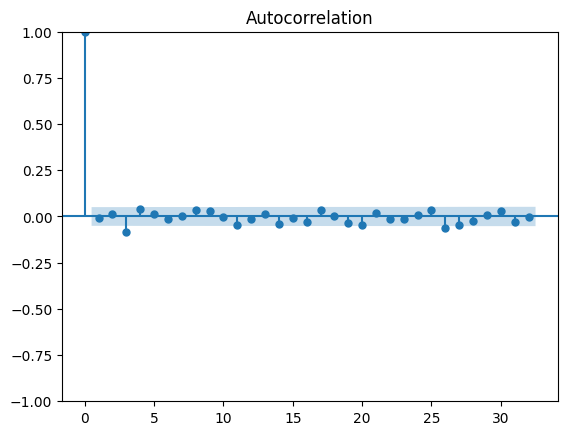

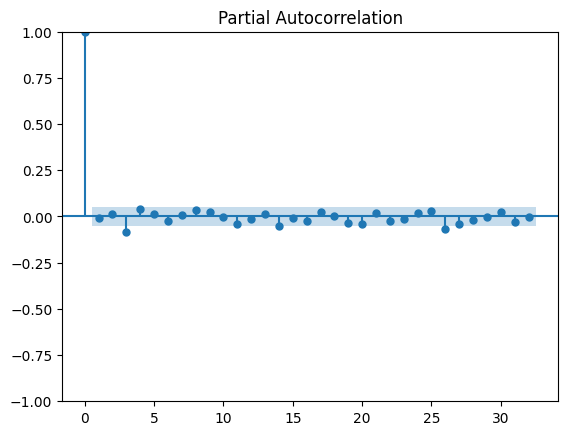

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=6.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.599, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=14.427, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14.435, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=12.734, Time=1.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14.161, Time=0.41 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 9.057 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1195
Model:                        SARIMAX   Log Likelihood                  -5.300
Date:                Tue, 15 Oct 2024   AIC                             12.599
Time:                        02:36:29   BIC                             17.685
Sample:                             0   HQIC                            14.516
                         

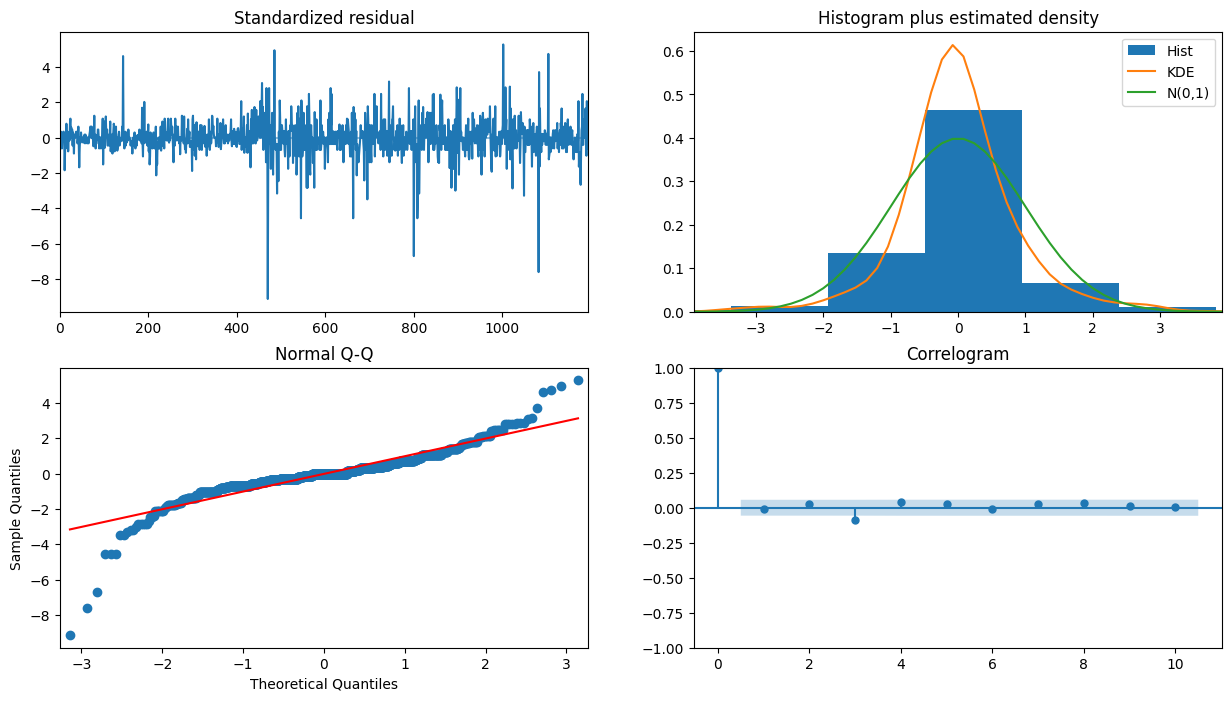

In [20]:
!pip install pmdarima

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(daily_data['Price Change'])
plt.show()

plot_pacf(daily_data['Price Change'])
plt.show()


# Prepare the data for ARIMA

y = daily_data['Price Change'].values
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]

# Optimize the ARIMA model using Auto-ARIMA
model_arima = pm.auto_arima(y_train,
                            test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model_arima.summary())
model_arima.plot_diagnostics(figsize=(15,8))
plt.show()


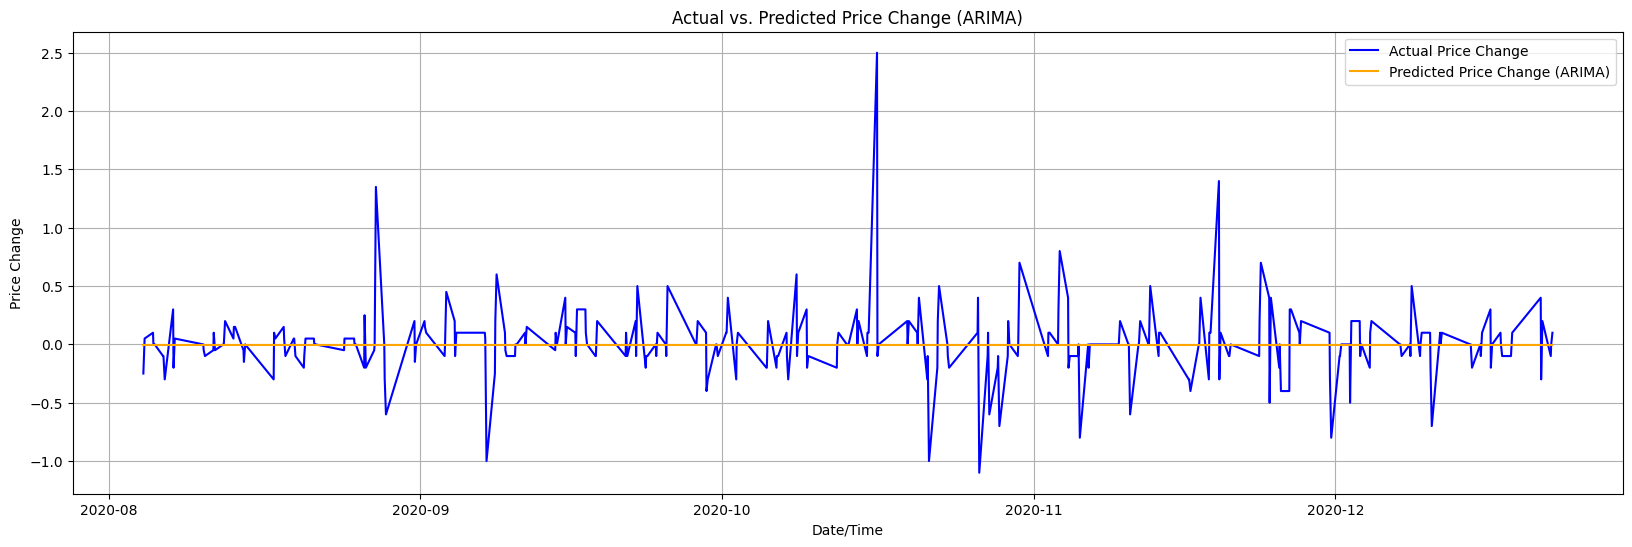

In [21]:
# Extract the order parameters from the summary
p, d, q = model_arima.order

# Fit the final ARIMA model on the training data
model_arima = ARIMA(y_train, order=(p, d, q))
model_arima_fit = model_arima.fit()


# Make predictions on the test set
predictions_arima = model_arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(daily_data['Date/Time'][train_size:], y_test, label='Actual Price Change', color='blue')
plt.plot(daily_data['Date/Time'][train_size:], predictions_arima, label='Predicted Price Change (ARIMA)', color='orange')
plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Actual vs. Predicted Price Change (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()
